# Preâmbulo

A trasnformada de Hough tem como base um modelo analı́tico que relaciona o espaço imagem a um espaço de parâmetros, assim trasnformando as coordenadas dos pixels em paranetros analíticos.

Com isso identificação e localização de objetos geometricos se torna extremamente simples

Porém a transformada de Hough não garante inversa para a reconstrução da imagem.

# Código

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

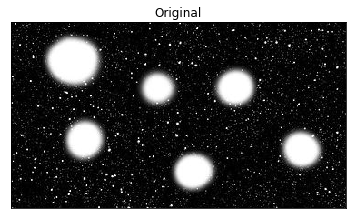

In [43]:
imgname = 'Cosmos_original'

img = cv2.imread(imgname + '.png',0)
plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

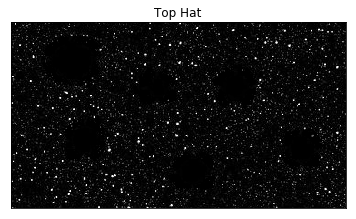

In [44]:
kernel = np.ones((5,5),np.uint8)
erosao = cv2.erode(img,kernel,iterations = 1)
abertura = cv2.dilate(erosao,kernel,iterations = 1)
top_hat = img - abertura

plt.imshow(top_hat,cmap = 'gray')
plt.title('Top Hat'), plt.xticks([]), plt.yticks([])
plt.show()

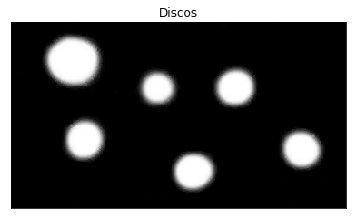

In [61]:
segmentacao_discos = img - top_hat
plt.imshow(segmentacao_discos,cmap = 'gray')
plt.title('Discos'), plt.xticks([]), plt.yticks([])
plt.show()

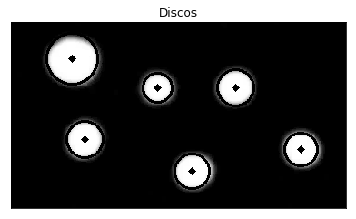

In [62]:
circles = cv2.HoughCircles(segmentacao_discos,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

img_com_cirulos = segmentacao_discos.copy()
for i in circles[0,:]:
    cv2.circle(img_com_cirulos,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(img_com_cirulos,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(img_com_cirulos,cmap = 'gray')
plt.title('Discos'), plt.xticks([]), plt.yticks([])
plt.show()

In [47]:
circles.shape[1]

6

In [37]:
for i in circles[0,:]:
    print("X=" + str(i[0]) + " Y=" + str(i[1]), " Raio=" + str(i[2]))

X=67.5 Y=40.5  Raio=28.1
X=81.5 Y=129.5  Raio=20.5
X=161.5 Y=72.5  Raio=16.9
X=319.5 Y=140.5  Raio=18.5
X=199.5 Y=164.5  Raio=19.4
X=247.5 Y=72.5  Raio=20.2


# Resultados

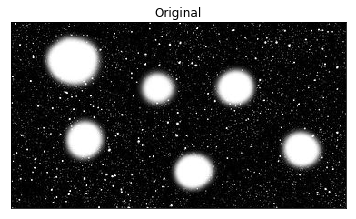

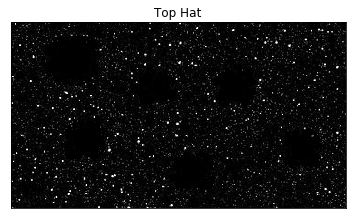

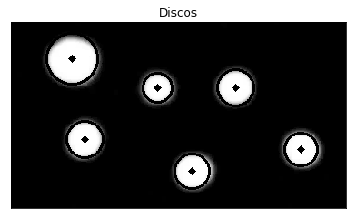

|Nº|X|Y|Raio|
|---|---|---|---|
|1|67.5| 40.5| 28.1|
|2|81.5| 129.5| 20.5|
|3|161.5| 72.5| 16.9|
|4|319.5| 140.5| 18.5|
|5|199.5| 164.5| 19.4|
|6|247.5| 72.5| 20.2|

# Análises

Todos os 6 circulos presentes na imagem foi dectetados com sucesso e de maneira simples e trivial, além disso foi possivel obter seu centro e raio.